In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [6]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [7]:
#independent variable
inputs = df.drop('Survived', axis='columns')
#target variable
target = df.Survived

In [8]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [9]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [24]:
inputs.Sex[:10]

0    1
1    2
2    2
3    2
4    1
5    1
6    1
7    1
8    2
9    2
Name: Sex, dtype: int64

In [25]:
inputs['Age'].isnull().sum()

np.int64(0)

In [26]:
inputs.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [27]:
age_median = inputs.Age.median()

In [28]:
age_median

28.0

In [29]:
inputs.Age = inputs.Age.fillna(age_median)

In [30]:
inputs

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,2,19.0,30.0000
888,3,2,28.0,23.4500
889,1,1,26.0,30.0000


In [32]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [33]:
len(X_train)

712

In [34]:
len(X_test)

179

In [38]:
classifier = DecisionTreeClassifier()

In [39]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
classifier.score(X_test, y_test)

0.7988826815642458

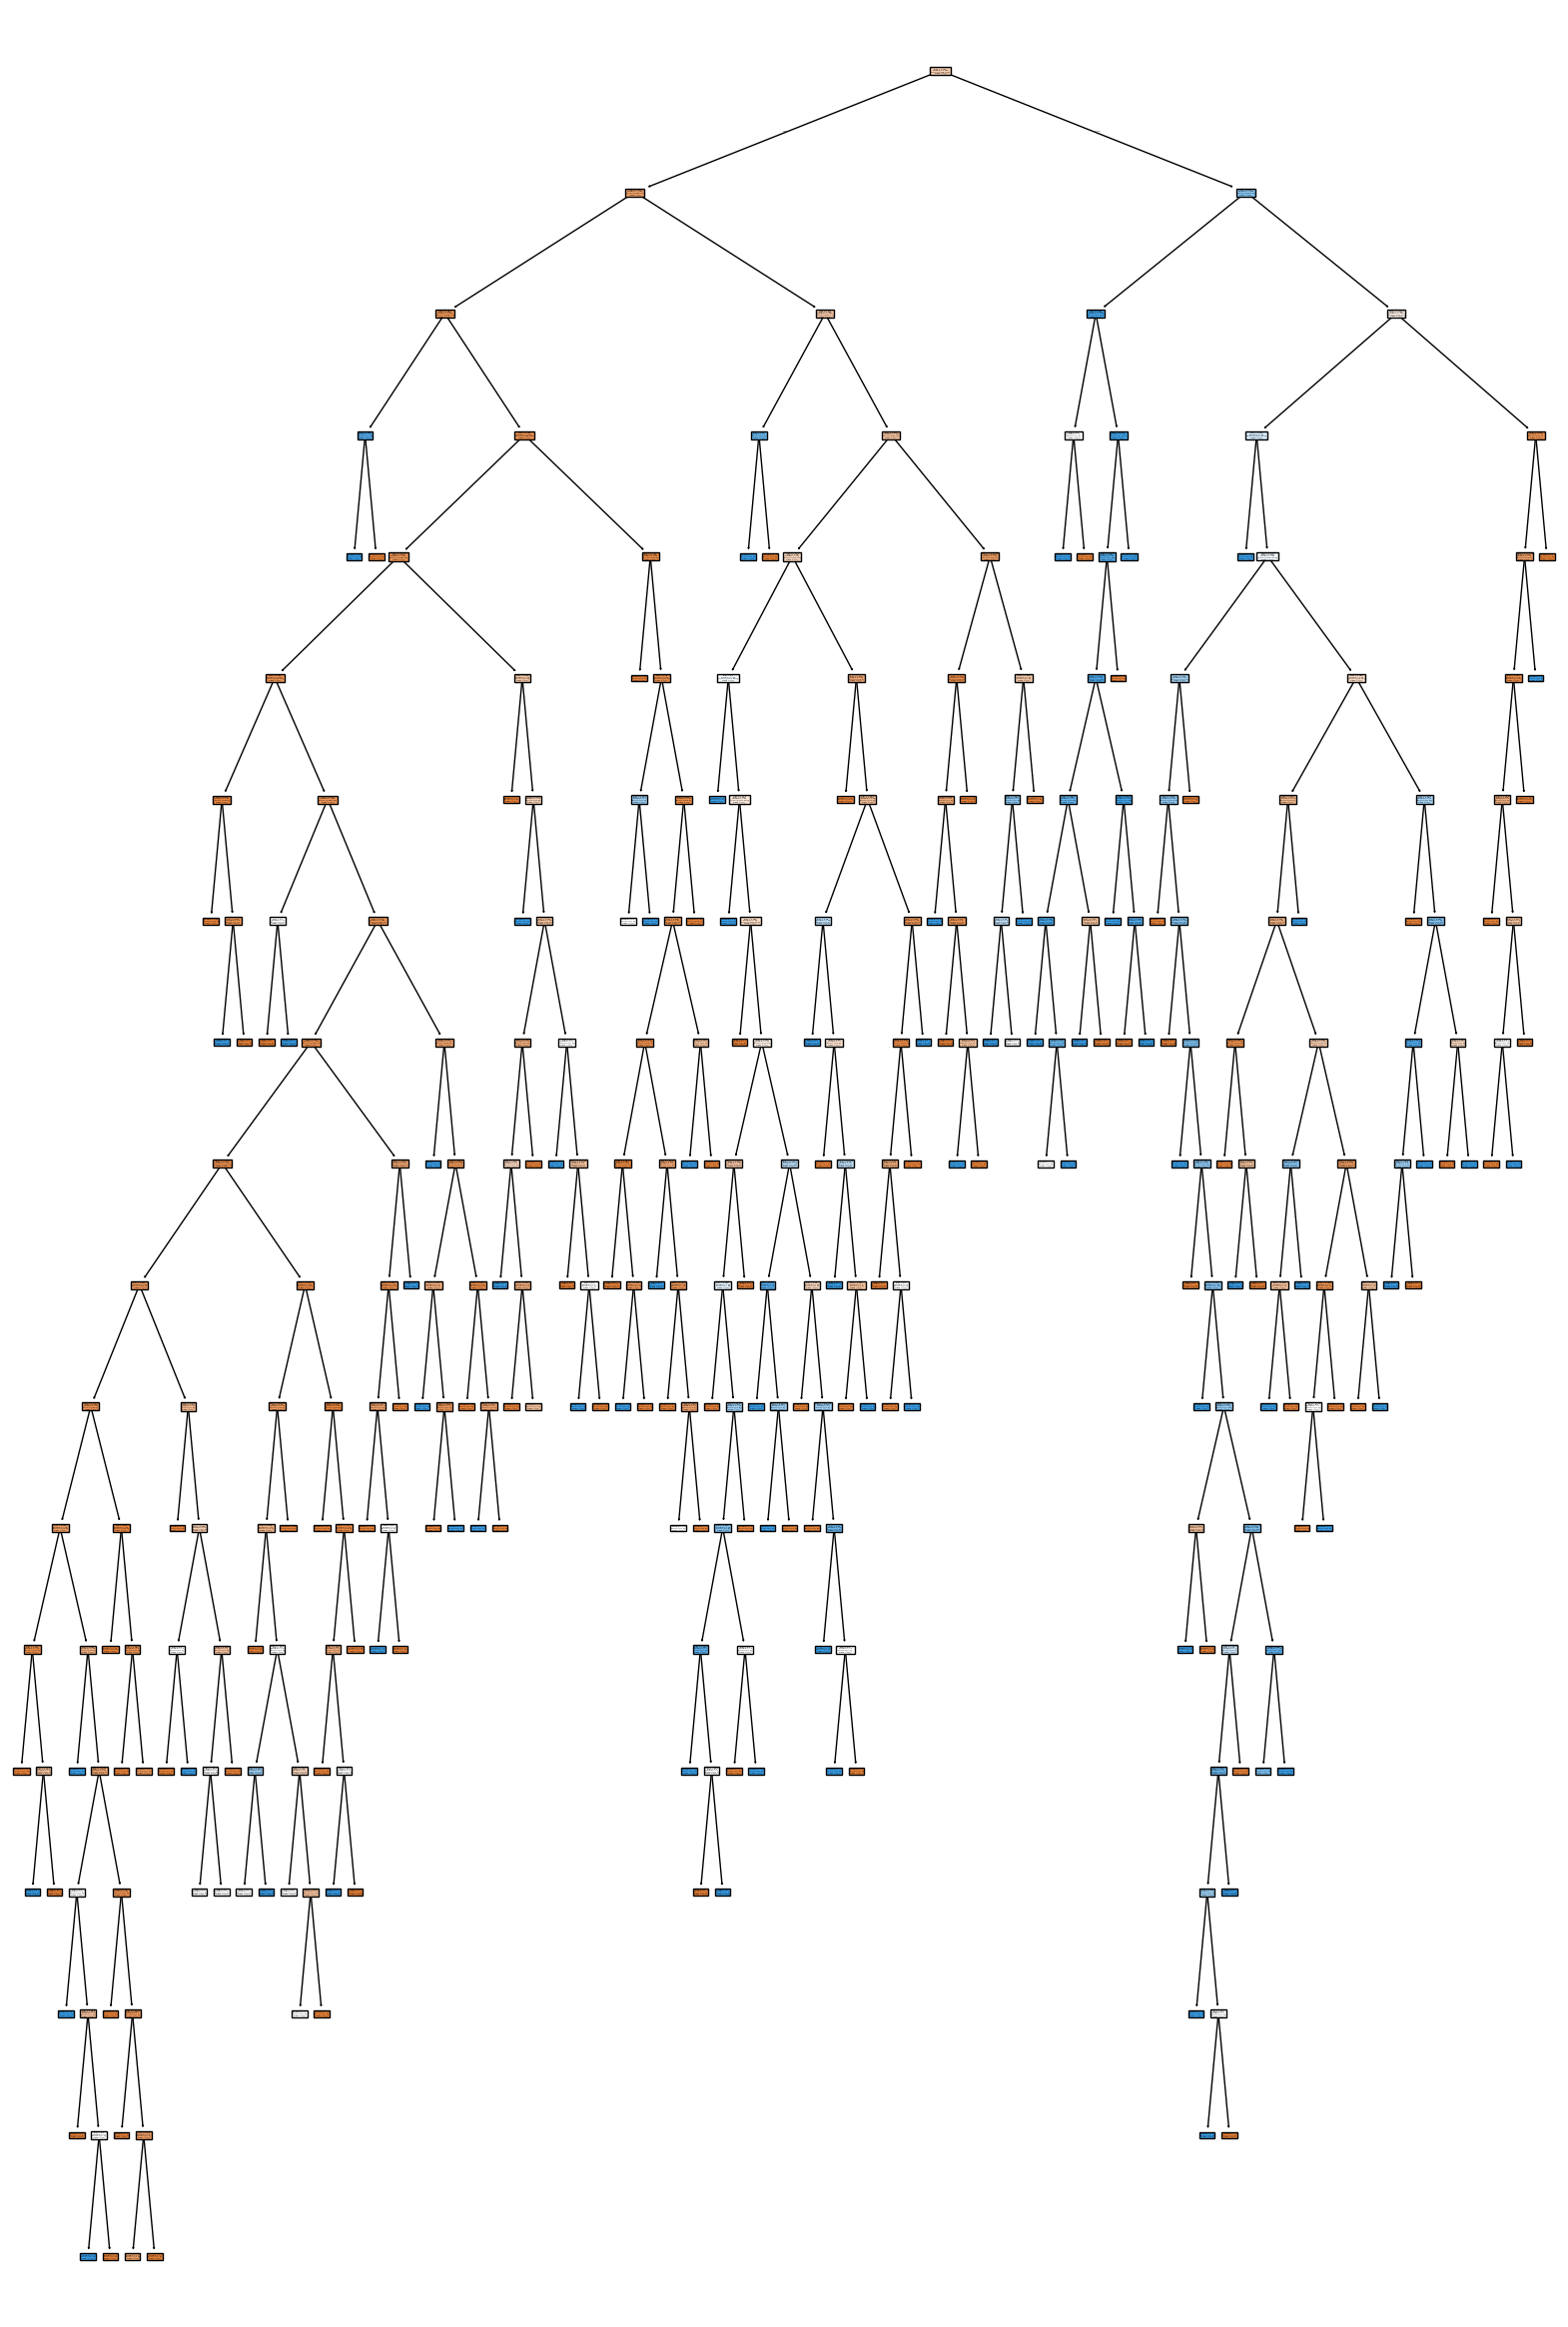

In [42]:
plt.figure(figsize=(20, 30))
tree.plot_tree(classifier, filled=True, feature_names=X_train.columns, class_names=True)
plt.show()